# Data Collection

The original dataset, US Domestic Flights Delay Prediction (2013 - 2018) (Source: [Kaggle](https://www.kaggle.com/datasets/gabrielluizone/us-domestic-flights-delay-prediction-2013-2018)), is provided as a zip archive of 1.54 GB. When decompressed, the archive contains 60 files with a total size of 13.6 GB. Each file corresponds to one month of data, starting from January 2014 and ending in December 2018.

Steps for collecting and cleaning the data:

*	Loading the first file
*	Evaluating the data’s size and quality
*	Defining the specific data needed for the project
*	Developing a process for data organization and cleaning
*	Testing the code on one month’s data file
*	Applying the code to all files
*	Accumulating the complete dataset


The archive file (csv_flight.zip) was downloaded and saved locally.

## Loading the first file

In [2]:
# import required modules
import zipfile
import os
import pandas as pd
os.chdir('/Users/a.kholodov/Documents/02. Personal/20. Education/50. Universities/Springboard/Springboard_git/Springboard _repo/CS2-flights-delay-REPO')
os.getcwd()

'/Users/a.kholodov/Documents/02. Personal/20. Education/50. Universities/Springboard/Springboard_git/Springboard _repo/CS2-flights-delay-REPO'

In [3]:

source_zip_file = 'data/interim/csv_flight.zip'
data_file = 'csv_flight/report_2014_1.csv'

# reading the first file to evaluate the data
with zipfile.ZipFile(source_zip_file) as zip_source:
    with zip_source.open(data_file) as data_file:
        flights_2014_1 = pd.read_csv(data_file, low_memory=False)

## Data size

In [4]:
print(flights_2014_1.shape)
print(flights_2014_1.info())

(471949, 110)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471949 entries, 0 to 471948
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 396.1+ MB
None


The data for one month contains 471,949 rows and 110 columns, with a total memory size of 396 MB. The estimated size of the entire dataset, without reorganization or cleaning, may exceed 23 GB, which could be challenging to process locally. Therefore, one of the goals of data preparation will be to reduce the dataset size without compromising quality.

## Data structure and check
### Date of the flight

In [5]:
flights_2014_1.iloc[:,:6].head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate
0,2014,1,1,30,4,2014-01-30
1,2014,1,1,31,5,2014-01-31
2,2014,1,1,1,3,2014-01-01
3,2014,1,1,2,4,2014-01-02
4,2014,1,1,3,5,2014-01-03


0. **Year**
    * **Description:** Year
    * **Data type:** int16
    * **Keep**
    * **Comment:** Despite there is a field FlightData, I decided to keep separat fileds because they can correlate with flights delay

1. **Quarter**  
    * **Description:** Quarter (1-4)  
    * **Data type:** int8
    * **Keep**

2. **Month**  
    * **Description:** Month (1-12)  
    * **Data type:** int8
    * **Keep**

3. **DayofMonth**  
    * **Description:** Day of month  
    * **Data type:** int8
    * **Keep**

4. **DayOfWeek**  
    * **Description:** Day of week  
    * **Data type:** int8
    * **Keep**  

5. **FlightDate**  
    * **Description:** Flight Date (yyyymmdd)
    * **Data type:** datetime
    * **Keep**

Values check for fields of Date of the flight: the data accurate, there is no outliers or NA.

In [6]:
flights_2014_1.loc[:5, ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate']].describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek
count,6.0,6.0,6.0,6.000000,6.000000
mean,2014.0,1.0,1.0,11.833333,4.500000
std,0.0,0.0,0.0,14.497126,1.048809
min,2014.0,1.0,1.0,1.000000,3.000000
25%,2014.0,1.0,1.0,2.250000,4.000000
50%,2014.0,1.0,1.0,3.500000,4.500000
75%,2014.0,1.0,1.0,23.500000,5.000000
max,2014.0,1.0,1.0,31.000000,6.000000


In [7]:
flights_2014_1.iloc[:,5].unique()

array(['2014-01-30', '2014-01-31', '2014-01-01', '2014-01-02',
       '2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
       '2014-01-07', '2014-01-08', '2014-01-09', '2014-01-10',
       '2014-01-11', '2014-01-12', '2014-01-13', '2014-01-14',
       '2014-01-15', '2014-01-16', '2014-01-17', '2014-01-18',
       '2014-01-19', '2014-01-20', '2014-01-21', '2014-01-22',
       '2014-01-23', '2014-01-24', '2014-01-25', '2014-01-26',
       '2014-01-27', '2014-01-28', '2014-01-29'], dtype=object)

But we need to change the data type during the data transformation from current type to the types in the table above.

In [8]:
flights_2014_1.iloc[:,:6].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471949 entries, 0 to 471948
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Year        471949 non-null  int64 
 1   Quarter     471949 non-null  int64 
 2   Month       471949 non-null  int64 
 3   DayofMonth  471949 non-null  int64 
 4   DayOfWeek   471949 non-null  int64 
 5   FlightDate  471949 non-null  object
dtypes: int64(5), object(1)
memory usage: 21.6+ MB


In [9]:
flights_2014_1.iloc[:,:6].isna().sum()

Year          0
Quarter       0
Month         0
DayofMonth    0
DayOfWeek     0
FlightDate    0
dtype: int64

###  Airline's and flight's details 

In [10]:
flights_2014_1.iloc[:, 6:10].head()

,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number
0,AA,19805,AA,N006AA
1,AA,19805,AA,N003AA
2,AA,19805,AA,N002AA
3,AA,19805,AA,N002AA
4,AA,19805,AA,N014AA



6. **Reporting_Airline**
    * **Description:**  Unique Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users, for example, PA, PA(1), PA(2). Use this field for analysis across a range of years. 
    * **Data type:** category 
    * **Keep**
    * **Comment:** I decided to keep this field and drop DOT_ID_Reporting_Airline and IATA_CODE_Reporting_Airline because it is declared as unique and recomended by data provider as such | 

7. **DOT_ID_Reporting_Airline**
    * **Description** An identification number assigned by US DOT to identify a unique airline (carrier). A unique airline (carrier) is defined as one holding and reporting under the same DOT certificate regardless of its Code, Name, or holding company/corporation.
    * **Drop**
    * **Comment:** Not unique
    
8. **IATA_CODE_Reporting_Airline**
    * **Description:** Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
    * **Drop**
    * **Comment:** Not unique

9. **Tail_Number**
    * **Description:** Tail Number
    * **Drop**
    * **Comment:** Irrelevant to the purposes of the project

10. **Flight_Number_Reporting_Airline**
    * **Description:** Flight Number
    * **Data type:** int16
    * **Keep**
    * **Comment:** Unique number of the flight at a specific day/time

In [11]:
flights_2014_1.iloc[:, 6].unique()

array(['AA', 'AS', 'DL', 'EV', 'B6', 'F9', 'FL', 'HA', 'MQ', 'US', 'OO',
       'VX', 'WN', 'UA'], dtype=object)

In [12]:
flights_2014_1['Flight_Number_Reporting_Airline'].describe()

count    471949.000000
mean       2304.719605
std        1857.378202
min           1.000000
25%         707.000000
50%        1780.000000
75%        3583.000000
max        8404.000000
Name: Flight_Number_Reporting_Airline, dtype: float64

In [13]:
flights_2014_1[['Reporting_Airline', 'Flight_Number_Reporting_Airline']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471949 entries, 0 to 471948
Data columns (total 2 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   Reporting_Airline                471949 non-null  object
 1   Flight_Number_Reporting_Airline  471949 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.2+ MB


In [14]:
flights_2014_1[['Reporting_Airline', 'Flight_Number_Reporting_Airline']].isna().sum()

Reporting_Airline                  0
Flight_Number_Reporting_Airline    0
dtype: int64

The data in the fields Reporting_Airline and Flight_Number_Reporting_Airline is accurate, there is no outliers or NA, But I need to change the data type during the data transformation.

###  Origin and Destination detailes

In [15]:
DestFields = ['DestAirportID', 
                'DestAirportSeqID', 
                'DestCityMarketID',
                'Dest',
                'DestCityName',
                'DestState',
                'DestStateFips',
                'DestStateName',
                'DestWac']
flights_2014_1.loc[:5, DestFields]

,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac
0,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62
1,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62
2,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
3,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
4,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
5,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74


In [16]:
OriginFields = ['OriginAirportID', 
                'OriginAirportSeqID', 
                'OriginCityMarketID',
                'Origin',
                'OriginCityName',
                'OriginState',
                'OriginStateFips',
                'OriginStateName',
                'OriginWac']
flights_2014_1.loc[:5, OriginFields]

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
0,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
1,11298,1129803,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
2,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62
3,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62
4,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62
5,12278,1227802,30928,ICT,"Wichita, KS",KS,20,Kansas,62


Origin and Destination data has the same structure so I will treat it the same way.

11.	**OriginAirportID / 20. DestAirportID**  
    * **Description:** Origin/Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused.  
    * **Data type:** category  
    * **Keep**  
    * **Comment:** I decided to keep these codes because of its uniqueness, assuared by data provider.  
    
12.	**OriginAirportSeqID / 21. DestAirportSeqID**  
    * **Description:** Origin/Destination Airport, Airport Sequence ID. An identification number assigned by US DOT to identify a unique airport at a given point of time. Airport attributes, such as airport name or coordinates, may change over time.
    * **Drop**
13.	**OriginCityMarketID / 22. DestCityMarketID**
    * **Description:** Origin/Destination Airport, City Market ID. City Market ID is an identification number assigned by US DOT to identify a city market. Use this field to consolidate airports serving the same city market.
    * **Drop**
14.	**Origin / 23. Dest**
    * **Description:** Origin/Destination Airport
    * **Data type:** category
    * **Keep**
    * **Comment:** This core is IATA code of the airport, which is represented in most traveling documents. It could be useful in the model.
15.	**OriginCityName / 24. DestCityName**
    * **Description:** Origin/Destination Airport, City Name
    * **Drop**
16.	**OriginState / 25. DestState**
    * **Description:** Origin/Destination Airport, State Code
    * **Drop**
17.	**OriginStateFips / 26. DestStateFips**
    * **Description:** Origin/Destination Airport, State Fips
    * **Drop**
18.	**OriginStateName / 27. DestStateName**
    * **Description:** Origin/Destination Airport, State Name
    * **Drop**
19.	**OriginWac / 28. DestWac**
    * **Description:** Origin/Destination Airport, World Area Code
    * **Drop**

In [17]:
flights_2014_1.loc[:, 'OriginAirportID'].unique()

array([11298, 12278, 13303, 10666, 14057, 13830, 13796, 14893, 12758,
       12173, 14831, 14747, 14679, 12982, 10299, 11278, 11618, 12892,
       13204, 10721, 13930, 11697, 13487, 14100, 10551, 10170, 14709,
       10754, 11630, 12819, 12523, 10926, 15991, 14828, 14256, 15841,
       13873, 13970, 14107, 14771, 14262, 14908, 10800, 13891, 12889,
       15376, 10423, 11292, 14683, 11884, 14869, 12266, 10397, 15016,
       13198, 10165, 11193, 10713, 15624, 14730, 14027, 12953, 12478,
       10994, 10693, 10781, 10599, 11481, 15304, 14635, 11433, 10821,
       10868, 13342, 11042, 11066, 13244, 10257, 11109, 13485, 10529,
       11775, 11996, 12448, 14193, 11641, 11057, 12206, 12264, 10208,
       10792, 11267, 12992, 14843, 11624, 10874, 14122, 15412, 14524,
       11973, 10140, 13871, 13495, 15370, 14576, 11721, 13851, 13931,
       15249, 12217, 11252, 15024, 13232, 10849, 12451, 14685, 12339,
       14492, 13577, 11503, 13360, 11995, 14986, 12191, 15323, 14570,
       11986, 15096,

In [18]:
flights_2014_1.loc[:, 'DestAirportID'].unique()

array([12278, 11298, 15304, 13830, 14831, 12758, 14893, 14747, 14057,
       13796, 12173, 14679, 10299, 12982, 10666, 11278, 12892, 11618,
       13204, 10721, 13930, 14100, 11697, 13487, 10551, 10170, 14709,
       10754, 11630, 12819, 12523, 15991, 10926, 14828, 14256, 15841,
       13873, 13970, 14107, 14771, 14262, 14908, 10800, 13891, 12889,
       15376, 10423, 11292, 11884, 14683, 14869, 12266, 10397, 15016,
       13198, 10165, 12953, 10713, 12478, 10821, 15624, 14027, 11433,
       13495, 14492, 11066, 13232, 14986, 11996, 11986, 10868, 10994,
       13342, 12448, 11995, 10599, 13244, 14321, 11481, 12264, 11042,
       11057, 14635, 13303, 12339, 11193, 13485, 10529, 14193, 14843,
       12206, 10792, 11267, 10693, 12992, 11624, 10874, 15412, 14122,
       14524, 11973, 10140, 13871, 15370, 14576, 15024, 10781, 11721,
       13851, 13931, 15249, 12217, 11252, 14685, 10849, 12451, 14730,
       11503, 13577, 11641, 13360, 11637, 11540, 12191, 14570, 14307,
       15096, 13422,

In [19]:
flights_2014_1.loc[:, 'Origin'].unique()

array(['DFW', 'ICT', 'MIA', 'BLI', 'PDX', 'OGG', 'OAK', 'SMF', 'KOA',
       'HNL', 'SJC', 'SEA', 'SAN', 'LIH', 'ANC', 'DCA', 'EWR', 'LAX',
       'MCO', 'BOS', 'ORD', 'FLL', 'MSP', 'PHL', 'BET', 'ADQ', 'SCC',
       'BRW', 'FAI', 'KTN', 'JNU', 'CDV', 'YAK', 'SIT', 'PSG', 'WRG',
       'OME', 'OTZ', 'PHX', 'SFO', 'PSP', 'SNA', 'BUR', 'ONT', 'LAS',
       'TUS', 'AUS', 'DEN', 'SAT', 'GEG', 'SLC', 'IAH', 'ATL', 'STL',
       'MCI', 'ADK', 'CVG', 'BOI', 'VPS', 'SDF', 'PBI', 'LGA', 'JFK',
       'CHS', 'BNA', 'BTR', 'BHM', 'ECP', 'TPA', 'RSW', 'DTW', 'BWI',
       'CAE', 'MKE', 'CLE', 'CMH', 'MEM', 'ALB', 'COS', 'MSN', 'BDL',
       'FSD', 'GSP', 'JAN', 'PNS', 'FAY', 'CLT', 'HRL', 'IAD', 'AGS',
       'BUF', 'DAY', 'LIT', 'SJU', 'EYW', 'CAK', 'PIT', 'TYS', 'RIC',
       'GPT', 'ABQ', 'OMA', 'MSY', 'TUL', 'ROC', 'FNT', 'OKC', 'ORF',
       'TLH', 'HSV', 'DAB', 'STT', 'MDW', 'BZN', 'JAX', 'SAV', 'IND',
       'RDU', 'MYR', 'EGE', 'MLB', 'GSO', 'SRQ', 'HOU', 'TRI', 'RNO',
       'GRR', 'SYR',

In [20]:
flights_2014_1.loc[:, 'Dest'].unique()

array(['ICT', 'DFW', 'TPA', 'OGG', 'SJC', 'KOA', 'SMF', 'SEA', 'PDX',
       'OAK', 'HNL', 'SAN', 'ANC', 'LIH', 'BLI', 'DCA', 'LAX', 'EWR',
       'MCO', 'BOS', 'ORD', 'PHL', 'FLL', 'MSP', 'BET', 'ADQ', 'SCC',
       'BRW', 'FAI', 'KTN', 'JNU', 'YAK', 'CDV', 'SIT', 'PSG', 'WRG',
       'OME', 'OTZ', 'PHX', 'SFO', 'PSP', 'SNA', 'BUR', 'ONT', 'LAS',
       'TUS', 'AUS', 'DEN', 'GEG', 'SAT', 'SLC', 'IAH', 'ATL', 'STL',
       'MCI', 'ADK', 'LGA', 'BOI', 'JFK', 'BWI', 'VPS', 'PBI', 'DTW',
       'MSY', 'RDU', 'CMH', 'MDW', 'SRQ', 'GSP', 'GRR', 'CAE', 'CHS',
       'MKE', 'JAN', 'GSO', 'BHM', 'MEM', 'PWM', 'ECP', 'IAD', 'CLE',
       'CLT', 'RSW', 'MIA', 'IND', 'CVG', 'MSN', 'BDL', 'PNS', 'SJU',
       'HRL', 'BUF', 'DAY', 'BNA', 'LIT', 'EYW', 'CAK', 'TYS', 'PIT',
       'RIC', 'GPT', 'ABQ', 'OMA', 'TUL', 'ROC', 'STT', 'BTR', 'FNT',
       'OKC', 'ORF', 'TLH', 'HSV', 'DAB', 'SAV', 'BZN', 'JAX', 'SDF',
       'EGE', 'MYR', 'FAY', 'MLB', 'FAR', 'ELP', 'HOU', 'RNO', 'PVD',
       'SYR', 'MOB',

In [21]:
# Check for equal number of Origin Airport IDs and Origin (IATA codes)
print('Number of unique OriginAirport IDs:', flights_2014_1.loc[:, 'OriginAirportID'].nunique(),
      '\nNumber of unique Origin codes:', flights_2014_1.loc[:, 'Origin'].nunique())

Number of unique OriginAirport IDs: 301 
Number of unique Origin codes: 301


In [22]:
# Check for equal number of Origin Airport IDs and Origin (IATA codes)
print('Number of unique DestAirport IDs:', flights_2014_1.loc[:, 'DestAirportID'].nunique(),
      '\nNumber of unique Destination codes:', flights_2014_1.loc[:, 'Dest'].nunique())

Number of unique DestAirport IDs: 301 
Number of unique Destination codes: 301


In [23]:
# Check for NA-values in the fields, I suppose to keep
flights_2014_1[['OriginAirportID', 'Origin', 'DestAirportID', 'Dest']].isna().sum()

OriginAirportID    0
Origin             0
DestAirportID      0
Dest               0
dtype: int64

The numbers of unique code for OriginalAirportID/DestAirportID and Origin/Dest are equal, and they don't have NA-values.

###  Departure and Arrival times (scheduled and actual)

In [24]:
# Sample of the block of data for departure times
DepFields = ['CRSDepTime', 
             'DepTime',
             'DepDelay',
             'DepDelayMinutes',
             'DepDel15',
             'DepartureDelayGroups',
             'DepTimeBlk']
flights_2014_1.loc[:5, DepFields]

,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk
0,940,935.0,-5.0,0.0,0.0,-1.0,0900-0959
1,940,951.0,11.0,11.0,0.0,0.0,0900-0959
2,1135,1144.0,9.0,9.0,0.0,0.0,1100-1159
3,1135,1134.0,-1.0,0.0,0.0,-1.0,1100-1159
4,1135,1129.0,-6.0,0.0,0.0,-1.0,1100-1159
5,1135,1141.0,6.0,6.0,0.0,0.0,1100-1159


In [25]:
# Sample of the block of data for arrival times
ArrFields = ['CRSArrTime', 
             'ArrTime',
             'ArrDelay',
             'ArrDelayMinutes',
             'ArrDel15',
             'ArrivalDelayGroups',
             'ArrTimeBlk']
flights_2014_1.loc[:5, ArrFields]

,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk
0,1055,1051.0,-4.0,0.0,0.0,-1.0,1000-1059
1,1055,1115.0,20.0,20.0,1.0,1.0,1000-1059
2,1300,1302.0,2.0,2.0,0.0,0.0,1300-1359
3,1300,1253.0,-7.0,0.0,0.0,-1.0,1300-1359
4,1300,1244.0,-16.0,0.0,0.0,-2.0,1300-1359
5,1300,1301.0,1.0,1.0,0.0,0.0,1300-1359


Two groups of data (for Departure and Arrival time) have the same stricture and similar meaning (with difference in departure or arrival), so I group and describe them togethher.

All time date in dataset is integer in format HHMM. I think for the further analysis it's worth to convert it into the number of minutes from the start of the day.

29.	**CRSDepTime  40. CRSArrTime** 
    * **Description:** CRS Departure/Arrival Time (local time: hhmm)
    * **Data type:** float
    * **Keep**
    * **Comment:** CRS (Computer Reservation System) represents the scuduled time for the flight. I decided to keep this data at this stage becuase it's not clear yet which will be the drivers of the future model - time or categorical time blocks, such as DepTimeBlk or ArrTimeBlk. I suppose to make this decision later. Needs to conver to the number of minutes.
30.	**DepTime  41. ArrTime**  
    * **Description:** Actual Departure/Arrival Time (local time: hhmm)
    * **Data type:** float
    * **Keep**
    * **Comment:** Needs to conver to the number of minutes.
31.	**DepDelay  42. ArrDelay**  
    * **Description:** Difference in minutes between scheduled and actual departure/arrival time. Early departures/arrival show negative numbers.
    * **Data type:** float
    * **Keep**
32.	**DepDelayMinutes  43. ArrDelayMinutes**
    * **Description:** Difference in minutes between scheduled and actual departure/arrival time. Early departures/arrival set to 0.
    * **Drop**
    * **Comment:** This data dublicates partially the field DepDelay and ArrDelay with only differency that this data doesnt't show the negative values - departures or arrivals earlier
33.	**DepDel15  44. ArrDel15**
    * **Description:** Departure/Arrival Delay Indicator, 15 Minutes or More (1=Yes)
    * **Drop**
    * **Comment:** This field represents a boolean data indicating wheather or not the flight delayed. We have the same, and even more detailed information, in the fields with the delay in minutes
34.	**DepartureDelayGroups  45. ArrivalDelayGroups**
    * **Description:** Departure/Arrival Delay intervals, every (15 minutes from <-15 to >180)
    * **Data type:** category
    * **Keep**
    * **Comment:** This categorical data can be useful for prediction model instead of actual delay time. We have to decide and choose it later.
35.	**DepTimeBlk  46. ArrTimeBlk**
    * **Description:** CRS Departure Time Block, Hourly Intervals
    * **Data type:** category
    * **Keep**
    * **Comment:** This categorical data probably will be more usefull for the prediction model comparing to the acrual departure or arrival times in minutes. 

The folllowing data represent some time and duration for processes which I think highly correlated with data described above. I suppose this data (below) doesn't add any value to the prediction model, and I am going to DROP it.  
36.	TaxiOut: Taxi Out Time, in Minutes  
37.	WheelsOff: Wheels Off Time (local time: hhmm)  
38.	WheelsOn: Wheels On Time (local time: hhmm)  
39.	TaxiIn: Taxi In Time, in Minutes  



Let's check the fields supposed to be kept for null values and incosistent data 

In [26]:
# Check for values of the Departure block fields
flights_2014_1.loc[:, DepFields].describe()

,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups
count,471949.000000,441622.000000,441622.000000,441622.000000,441622.000000,441622.000000
mean,1324.137998,1340.554716,16.049397,18.382259,0.267820,0.468930
std,459.332673,473.999078,45.539116,44.463942,0.442824,2.503865
min,5.000000,1.000000,-112.000000,0.000000,0.000000,-2.000000
25%,930.000000,940.000000,-4.000000,0.000000,0.000000,-1.000000
50%,1320.000000,1333.000000,0.000000,0.000000,0.000000,0.000000
75%,1715.000000,1729.000000,17.000000,17.000000,1.000000,1.000000
max,2359.000000,2400.000000,1560.000000,1560.000000,1.000000,12.000000


In [27]:
# Check for values of the Arrival block fields
flights_2014_1.loc[:, ArrFields].describe()

,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups
count,471949.000000,440453.000000,439620.000000,439620.000000,439620.000000,439620.000000
mean,1510.874029,1501.132577,12.745314,18.775929,0.272949,0.314458
std,470.669308,496.412439,48.058170,44.886828,0.445476,2.645731
min,1.000000,1.000000,-112.000000,0.000000,0.000000,-2.000000
25%,1130.000000,1128.000000,-11.000000,0.000000,0.000000,-1.000000
50%,1527.000000,1528.000000,-1.000000,0.000000,0.000000,-1.000000
75%,1910.000000,1915.000000,17.000000,17.000000,1.000000,1.000000
max,2359.000000,2400.000000,1530.000000,1530.000000,1.000000,12.000000


In [28]:
# Check for NA-values in the Departure block fields
flights_2014_1.loc[:, DepFields].isna().sum()

CRSDepTime                  0
DepTime                 30327
DepDelay                30327
DepDelayMinutes         30327
DepDel15                30327
DepartureDelayGroups    30327
DepTimeBlk                  0
dtype: int64

In [29]:
# Check for NA-values in the Arrival block fields
flights_2014_1.loc[:, ArrFields].isna().sum()

CRSArrTime                0
ArrTime               31496
ArrDelay              32329
ArrDelayMinutes       32329
ArrDel15              32329
ArrivalDelayGroups    32329
ArrTimeBlk                0
dtype: int64

In [30]:
print(flights_2014_1['DepartureDelayGroups'].unique())
print(flights_2014_1['ArrivalDelayGroups'].unique())

[-1.  0.  1.  2.  6.  4.  3.  5. -2. nan 12.  9. 11.  8. 10.  7.]
[-1.  1.  0. -2.  2.  6.  3.  5. nan  7.  4.  8. 12.  9. 10. 11.]


In [31]:
print(sorted(flights_2014_1['DepTimeBlk'].unique()))
print(sorted(flights_2014_1['ArrTimeBlk'].unique()))

['0001-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059', '1100-1159', '1200-1259', '1300-1359', '1400-1459', '1500-1559', '1600-1659', '1700-1759', '1800-1859', '1900-1959', '2000-2059', '2100-2159', '2200-2259', '2300-2359']
['0001-0559', '0600-0659', '0700-0759', '0800-0859', '0900-0959', '1000-1059', '1100-1159', '1200-1259', '1300-1359', '1400-1459', '1500-1559', '1600-1659', '1700-1759', '1800-1859', '1900-1959', '2000-2059', '2100-2159', '2200-2259', '2300-2359']


#### Problems to analyse and solve:
1. **DepTime** and **ArrTime** contain time values '2400' (at the same time CRS times contain only 2359). I have to convert it into 0h00m of the next day.
2. It is needed to convert time into simple number of minutes from the start of the day.
3. DepTime has the same number of NA-values as DepDelay, but ArrTime and ArrDelay have number of NA-values different of those from NA-values in DepTime and DepDelay. Reason can be related to cancelled and diverted flights. There is need to check.
4. Delay Groups (Arrival and Departure) contain NaN values. Need to investigate.

In [32]:
# Test that all flight wtth NA Departure Time (DepTime) were cancelled
print('The Cancelled field has only these values:', flights_2014_1['Cancelled'].unique())
print('In this dataset there are', int(flights_2014_1['Cancelled'].sum()), 'cancelled flights in total')
print('Among', flights_2014_1.DepTime.isna().sum(), 'flights with NA DepTime there are', 
      flights_2014_1[flights_2014_1.DepTime.isna()]['Cancelled'].count(),'cancelled flights')

The Cancelled field has only these values: [0. 1.]
In this dataset there are 30852 cancelled flights in total
Among 30327 flights with NA DepTime there are 30327 cancelled flights


Ok. We see that all NA-values in DepTime field are explained by the flight cancellaiton. 
However, there is one more interesting thing: the total number of cancelled flight is higher than the number of NA-values in DepTime field. Does it mean that these flight were cancelled but still have departure time? Let's take a look at this. 

In [33]:
# How many Cancelled and Diverted flight are there in total?
flights_2014_1[['Cancelled', 'Diverted']].agg('sum')

Cancelled    30852.0
Diverted      1477.0
dtype: float64

In [34]:
# What is a split of flights with/NA Departure Time vs. Cancelled and Diverted flights 
flights_2014_1.groupby(flights_2014_1['DepTime'].isna())[['Cancelled', 'Diverted']].agg('sum')

,Cancelled,Diverted
DepTime,,
False,525.0,1477.0
True,30327.0,0.0


In [35]:
# Check all cancelled flight with existing departure time don't have Time in Air (flight time)
departured_cancelled_flights = (~flights_2014_1['DepTime'].isna()) & (flights_2014_1['Cancelled'] == 1)
print('Are all flights depatured but cancelled times have NA as AirTime?',
      flights_2014_1[departured_cancelled_flights]['AirTime'].isna().all())

Are all flights depatured but cancelled times have NA as AirTime? True


In [36]:
# Investigating which flights have NA DepartureDelayGroups
NA_DepDelay_group = flights_2014_1['DepartureDelayGroups'].isna()
print('Number of NA_values in DepartureDelayGoups:', NA_DepDelay_group.sum())

cancelled_before_depurture = flights_2014_1['DepTime'].isna() & (flights_2014_1['Cancelled'] == 1)
print('Are all cancelled prior departure flights have NA-value in DepartureDelayGroups?',
      flights_2014_1[cancelled_before_depurture]['DepartureDelayGroups'].isna().all())

Number of NA_values in DepartureDelayGoups: 30327
Are all cancelled prior departure flights have NA-value in DepartureDelayGroups? True


1. Departured flights still could be cancelled after departure (didn't take off, ruturned to gate) OR diverted to a different destination.
2. All flight with NA actual Departure Time ('DepTime' field) were canceled and have NA-Value in DepartureDelayGroups

Let’s examine the Arrival times in more detail.

In [37]:
# What is a split of flights with/NA Arrival Time vs. Cancelled and Diverted flights 
flights_2014_1.groupby(flights_2014_1['ArrTime'].isna())[['Cancelled', 'Diverted']].agg('sum')

,Cancelled,Diverted
ArrTime,,
False,0.0,833.0
True,30852.0,644.0


From this split it is interesting that some diverted (directed to other airports) flights still have Arrival time. What does this arravel time mean? Is it the arrival time to the Destination airport or the airport where the flight had beed diverted?
Le't examine this question using the field 'DivReachedDest' marking the flights reached Destination after being diverted.

In [38]:
# Check the numbers from diverted flights' split over w/NA ArrTime 
diverted_but_arrived = (~flights_2014_1['ArrTime'].isna()) & (flights_2014_1['Diverted'] == 1)
print('Number of diverted flights that have ArrTime', 
      flights_2014_1[diverted_but_arrived]['Flight_Number_Reporting_Airline'].count())
print('Number of diverted flights reached initial destination', 
      flights_2014_1['DivReachedDest'].sum())
print('Are all these the same flitghts?',
      flights_2014_1[diverted_but_arrived]['DivReachedDest'].sum() == flights_2014_1['DivReachedDest'].sum())

Number of diverted flights that have ArrTime 833
Number of diverted flights reached initial destination 833.0
Are all these the same flitghts? True


So, yes, all diverted flights which finally reached their initial destination have the Arrival time.

1. All flights having an actual Arrival Time ('ArrTime') split over flied directly from Origin to Destination OR were diverted but finally reached the Destination
2. All flights with NA ArrTime were wheather canceled or diverted and landed in different Destination

In [39]:
# Investigating which flights have NA ArrivalDelayGroups
NA_ArrivalDelay_groups = flights_2014_1['ArrivalDelayGroups'].isna()
flight_cancelled_OR_diverted = (flights_2014_1['Cancelled'] == 1) | (flights_2014_1['Diverted'] == 1)
print('The number of flight with NA-value in ArrivalDelayGroups', NA_ArrivalDelay_groups.sum())
print('Are all flights with NA-value ArrivalDelayGroups were canceled or diverted?',
      flights_2014_1[NA_ArrivalDelay_groups & flight_cancelled_OR_diverted]['Flight_Number_Reporting_Airline'].count() ==
      flights_2014_1[NA_ArrivalDelay_groups]['Flight_Number_Reporting_Airline'].count())

The number of flight with NA-value in ArrivalDelayGroups 32329
Are all flights with NA-value ArrivalDelayGroups were canceled or diverted? True


All Diverted or Cancelled flights have NA-value ArrivalDelayGroup

### Flight Status and Reasons for Delay  

I’m going to keep the following fields because they contain information that can be useful for interpreting the departure and arrival time fields and for calculating the actual elapsed time, respectively:

47.	**Cancelled**
    * **Description:** Cancelled Flight Indicator (1=Yes)  
    * **Data type:** boolean
    * **Keep**

48.	**CancellationCode**
    * **Description:** Specifies The Reason For Cancellation
    * **Data type:**  category
    * **Keep**

49.	**Diverted**
    * **Description:** Diverted Flight Indicator (1=Yes)  
    * **Data type:** boolean
    * **Keep**
    

Next fileds I suppose to keep to analyse the correclation between these reasons for delay with specific airlines, airport or states:

56.	**CarrierDelay**
    * **Description**: Carrier Delay, in Minutes  
    * **Data type:** float
    * **Keep**

57.	**WeatherDelay**  
    * **Description**: Weather Delay, in Minutes  
    * **Data type:** float
    * **Keep**

58.	**NASDelay** 
    * **Description**: National Air System Delay, in Minutes  
    * **Data type:** float
    * **Keep**

59.	**SecurityDelay**  
    * **Description**: Security Delay, in Minutes  
    * **Data type:** float
    * **Keep**

60.	**LateAircraftDelay**
    * **Description**: Late Aircraft Delay, in Minutes  
    * **Data type:** float
    * **Keep**

In [40]:
# Discovering the values and NA-values
flight_status_fields = ['Cancelled',
                        'CancellationCode',
                        'Diverted']
print(flights_2014_1[flight_status_fields].describe())
print(flights_2014_1[flight_status_fields].isna().sum())

           Cancelled       Diverted
count  471949.000000  471949.000000
mean        0.065371       0.003130
std         0.247180       0.055855
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max         1.000000       1.000000
Cancelled                0
CancellationCode    441097
Diverted                 0
dtype: int64


In [41]:
# Which values does the Cancellatino Code field have?
flights_2014_1['CancellationCode'].unique()

array([nan, 'B', 'A', 'C'], dtype=object)

In [42]:
# Examining the presence of Cancellation Codes for all Cancelled flights
print(flights_2014_1.groupby(['Cancelled', 'Diverted'])['CancellationCode'].agg('count'))
no_cancellation_code = flights_2014_1['CancellationCode'].isna()
print('Number of recortds (flights) with absent Cancellation Code but still were cancelled:',
      len(flights_2014_1[no_cancellation_code & ('Cancelled' == 0)]))

Cancelled  Diverted
0.0        0.0             0
           1.0             0
1.0        0.0         30852
Name: CancellationCode, dtype: int64
Number of recortds (flights) with absent Cancellation Code but still were cancelled: 0


The conclusion is that the data represented in the Flight Status and Cancellation Code fields is accurate and comprehensive.

### Elapsed time  

The scheduled and actual Elapsed Time data are the primary candidates for the outcome of the proposed prediction model, or at least one of the main components for constructing such a variable. This is why it is important to keep this data. Air Time can also be useful because, as we have already seen, it helps with identifying flights that were cancelled after departure.

50.	***CRSElapsedTime**
    * **Description:** CRS Elapsed Time of Flight, in Minutes  
    * **Data type:** float
    * **Keep**

51.	**ActualElapsedTime**  
    * **Description:** Elapsed Time of Flight, in Minutes  
    * **Data type:** float
    * **Keep**

52.	**AirTime:**  
    * **Description:** Flight Time, in Minutes  
    * **Data type:** float
    * **Keep**


The following data can be dropped because it is seemed irrelevand or can be obtaing from another fields:  

53.	**Flights**  
    * **Description:** Number of Flights  
    * **Drop**  

54.	**Distance**  
    * **Description:** Distance between airports (miles)  
    * **Drop**  

55.	**DistanceGroup**
    * **Description:**  Distance Intervals, every 250 Miles, for Flight Segment  
    * **Drop**
 
61.	**FirstDepTime**  
    * **Description:** First Gate Departure Time at Origin Airport  
    * **Drop**

62.	**TotalAddGTime**  
    * **Description:** Total Ground Time Away from Gate for Gate Return or Cancelled Flight  
    * **Drop**

63.	**LongestAddGTime**  
    * **Description:** Longest Time Away from Gate for Gate Return or Cancelled Flight  
    * **Drop**

64.	**DivAirportLandings**
    * **Description:** Number of Diverted Airport Landings  
    * **Drop**

As we already know, the next fields can be useful in evaluation of an acrual elapsed time when the flight was diverted, so we need to keep them:  

65.	**DivReachedDest**  
    * **Description:** Diverted Flight Reaching Scheduled Destination Indicator (1=Yes)  
    * **Data type:** boolean
    * **Keep**

66.	**DivActualElapsedTime**
    * **Description:** Elapsed Time of Diverted Flight Reaching Scheduled Destination, in Minutes. The ActualElapsedTime column remains NULL for all diverted flights.  
    * **Data type:** float
    * **Keep**

67.	**DivArrDelay**  
    * **Description:** Difference in minutes between scheduled and actual arrival time for a diverted flight reaching scheduled destination. The ArrDelay column remains NULL for all diverted flights.  
    * **Data Type:** float
    * **Keep**

The distance beetween the scheduled destination and final diverted airport in miles is unimportant for the purposed model because if the flight landed in different location, it is reasonable for the purpose of model consider this fliaght as not arrived to the distanation.

68.	**DivDistance**
    * **Description:** Distance between scheduled destination and final diverted airport (miles). Value will be 0 for diverted flight reaching scheduled destination.  
    * **Drop**

In [43]:
# Checking for possible and NA values for Elapsed time data block
elapsed_time_fields = ['CRSElapsedTime',
                       'ActualElapsedTime',
                       'AirTime']
print(flights_2014_1[elapsed_time_fields].describe())
print(flights_2014_1[elapsed_time_fields].isna().sum())

       CRSElapsedTime  ActualElapsedTime        AirTime
count   471949.000000      439620.000000  439620.000000
mean       137.400615         135.086875     111.636413
std         74.130674          74.329305      72.117051
min         19.000000          16.000000       7.000000
25%         85.000000          80.000000      59.000000
50%        118.000000         116.000000      92.000000
75%        170.000000         168.000000     142.000000
max        670.000000         764.000000     688.000000
CRSElapsedTime           0
ActualElapsedTime    32329
AirTime              32329
dtype: int64


In [44]:
# Checking for possible and NA values for Diverted flights data block
diverted_flights_fields = ['DivReachedDest',
                       'DivActualElapsedTime',
                       'DivArrDelay']
print(flights_2014_1[diverted_flights_fields].describe())
print(flights_2014_1[diverted_flights_fields].isna().sum())

       DivReachedDest  DivActualElapsedTime  DivArrDelay
count     1477.000000            833.000000   833.000000
mean         0.563981            364.955582   228.453782
std          0.496057            195.155613   183.260456
min          0.000000             90.000000     9.000000
25%          0.000000            250.000000   129.000000
50%          1.000000            313.000000   178.000000
75%          1.000000            417.000000   251.000000
max          1.000000           1968.000000  1651.000000
DivReachedDest          470472
DivActualElapsedTime    471116
DivArrDelay             471116
dtype: int64


### Another infermation about diverted flights

The rest of the dataset contains 5 equal blocks for five airports where the flight can be diverted consiquently. Each block contains:
* Diverted Airport Code, Airport ID of Diverted Airport,  
* Airport Sequence ID of Diverted Airport,  
* Wheels On Time (local time: hhmm) at Diverted Airport Code,  
* Total Ground Time Away from Gate at Diverted Airport Code,  
* Longest Ground Time Away from Gate at Diverted Airport Code,  
* Wheels Off Time (local time: hhmm) at Diverted Airport Code,  
* Aircraft Tail Number for Diverted Airport Code

All this information is not rellevant to the project. 

### Conclustion about data structure and quality:  

1. The data needed for the project is selected
2. The prpoesd data type for each field is selected
3. The quality of the data is good. The data represented in the dataset is comprehesive
4. The logic of data for calncelled and diverted flights and consiquencies for actual departure and arrival times, time delays and elapsed times was identified and recorded
5. On the data transformaiton stage I have to change data types for selected for the model fields and solve the 'time-2400' problem.
6. The calculation of the resulting elapsed time, which I suppose to take as a predicted variable of the model, will be realise further on the stage of features engeneering. 

## Data transformation

Let's begin with one file from 60 files to test the aproach. After testing we will use the same process for the rest of files.

In [45]:
import numpy as np

data_types = {
    'Year':                 np.int16,               
    'Quarter':              np.int8,                
    'Month':                np.int8,                
    'DayofMonth':           np.int8,
    'DayOfWeek':            np.int8,
    'FlightDate':           'str',
    'Reporting_Airline':    'category',
    'Flight_Number_Reporting_Airline':  np.int16,
    'OriginAirportID':      'category',
    'Origin':               'category',
    'DestAirportID':        'category',
    'Dest':                 'category',
    'CRSDepTime':           np.int16,
    'DepTime':              np.float32,
    'DepDelay':             np.float32,
    'DepartureDelayGroups': 'category',
    'DepTimeBlk':           'category',
    'CRSArrTime':           np.int16,
    'ArrTime':              np.float32,
    'ArrDelay':             np.float32,
    'ArrivalDelayGroups':   'category',
    'ArrTimeBlk':           'category',
    'Cancelled':            np.int8,        # boolean
    'CancellationCode':     'category',
    'Diverted':             np.int8,        # boolean
    'CarrierDelay':         np.float32,
    'WeatherDelay':         np.float32,
    'NASDelay':             np.float32,
    'SecurityDelay':        np.float32,
    'LateAircraftDelay':    np.float32,
    'CRSElapsedTime':       np.float32,
    'ActualElapsedTime':    np.float32,
    'AirTime':              np.float32,
    'DivReachedDest':       np.float32,        # boolean
    'DivActualElapsedTime': np.float32,
    'DivArrDelay':          np.float32,}

In [46]:
def transform_data_from(zip_file, data_file, field_type=None):
    # reading the file
    with zipfile.ZipFile(zip_file) as zip_source:
        with zip_source.open(data_file) as file:
            if field_type != None:
                df = pd.read_csv(file, header = 0, 
                                usecols = field_type.keys(),
                                dtype = field_type)
            else:
                df = pd.read_csv(file, header = 0, low_memory=False)

    # Converting dates and boolean        
    if 'FlightDate' in df.columns:
        df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    if 'DivReachedDest' in df.columns:
        df['DivReachedDest'] = df['DivReachedDest'].fillna(0)
    if 'Cancelled' in df.columns:
        df['Cancelled'] = df['Cancelled'].astype('bool')
    if 'Diverted' in df.columns:
        df['Diverted'] = df['Diverted'].astype('bool')
    if 'DivReachedDest' in df.columns:
        df['DivReachedDest'] = df['DivReachedDest'].astype('bool')
    return df

In [47]:
source_zip = 'data/interim/csv_flight.zip'
source_data = 'csv_flight/report_2014_1.csv'

flights_2014_1_new = transform_data_from(source_zip, source_data, data_types)

In [48]:
pd.set_option('display.max_columns', 200)
flights_2014_1_new.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Flight_Number_Reporting_Airline,OriginAirportID,Origin,DestAirportID,Dest,CRSDepTime,DepTime,DepDelay,DepartureDelayGroups,DepTimeBlk,CRSArrTime,ArrTime,ArrDelay,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,DivReachedDest,DivActualElapsedTime,DivArrDelay
0,2014,1,1,30,4,2014-01-30,AA,2377,11298,DFW,12278,ICT,940,935.0,-5.0,-1,0900-0959,1055,1051.0,-4.0,-1,1000-1059,False,NaN,False,75.0,76.0,56.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
1,2014,1,1,31,5,2014-01-31,AA,2377,11298,DFW,12278,ICT,940,951.0,11.0,0,0900-0959,1055,1115.0,20.0,1,1000-1059,False,NaN,False,75.0,84.0,54.0,11.0,0.0,9.0,0.0,0.0,False,NaN,NaN
2,2014,1,1,1,3,2014-01-01,AA,2377,12278,ICT,11298,DFW,1135,1144.0,9.0,0,1100-1159,1300,1302.0,2.0,0,1300-1359,False,NaN,False,85.0,78.0,57.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
3,2014,1,1,2,4,2014-01-02,AA,2377,12278,ICT,11298,DFW,1135,1134.0,-1.0,-1,1100-1159,1300,1253.0,-7.0,-1,1300-1359,False,NaN,False,85.0,79.0,53.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN
4,2014,1,1,3,5,2014-01-03,AA,2377,12278,ICT,11298,DFW,1135,1129.0,-6.0,-1,1100-1159,1300,1244.0,-16.0,-2,1300-1359,False,NaN,False,85.0,75.0,52.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN


In [49]:
flights_2014_1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471949 entries, 0 to 471948
Data columns (total 36 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   Year                             471949 non-null  int16         
 1   Quarter                          471949 non-null  int8          
 2   Month                            471949 non-null  int8          
 3   DayofMonth                       471949 non-null  int8          
 4   DayOfWeek                        471949 non-null  int8          
 5   FlightDate                       471949 non-null  datetime64[ns]
 6   Reporting_Airline                471949 non-null  category      
 7   Flight_Number_Reporting_Airline  471949 non-null  int16         
 8   OriginAirportID                  471949 non-null  category      
 9   Origin                           471949 non-null  category      
 10  DestAirportID                    471949 non-

In [50]:
# Just to see what was the original size of the dataset
flights_2014_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471949 entries, 0 to 471948
Columns: 110 entries, Year to Unnamed: 109
dtypes: float64(70), int64(21), object(19)
memory usage: 396.1+ MB


I converted data into new dataset. Elimination of redundant data and changing data types allowed to reduce the memery usage by more than 9 times.

In [51]:
# To free the memory space I'm deliting datasets, used for discovering the data and testing the data transfortation ideas
del(flights_2014_1, flights_2014_1_new)

In [52]:
source_zip = 'data/interim/csv_flight.zip'
source_path = 'csv_flight/report_'

flights = pd.DataFrame()
for year in range(2014, 2019):
    for month in range(1, 13):
        source_data = source_path + str(year) + '_' + str(month) + '.csv'
        print(source_data)
        flights = pd.concat([flights, transform_data_from(source_zip, source_data, data_types)], ignore_index=True)

csv_flight/report_2014_1.csv
csv_flight/report_2014_2.csv
csv_flight/report_2014_3.csv
csv_flight/report_2014_4.csv
csv_flight/report_2014_5.csv
csv_flight/report_2014_6.csv
csv_flight/report_2014_7.csv
csv_flight/report_2014_8.csv
csv_flight/report_2014_9.csv
csv_flight/report_2014_10.csv
csv_flight/report_2014_11.csv
csv_flight/report_2014_12.csv
csv_flight/report_2015_1.csv
csv_flight/report_2015_2.csv
csv_flight/report_2015_3.csv
csv_flight/report_2015_4.csv
csv_flight/report_2015_5.csv
csv_flight/report_2015_6.csv
csv_flight/report_2015_7.csv
csv_flight/report_2015_8.csv
csv_flight/report_2015_9.csv
csv_flight/report_2015_10.csv
csv_flight/report_2015_11.csv
csv_flight/report_2015_12.csv
csv_flight/report_2016_1.csv
csv_flight/report_2016_2.csv
csv_flight/report_2016_3.csv
csv_flight/report_2016_4.csv
csv_flight/report_2016_5.csv
csv_flight/report_2016_6.csv
csv_flight/report_2016_7.csv
csv_flight/report_2016_8.csv
csv_flight/report_2016_9.csv
csv_flight/report_2016_10.csv
csv_fli

In [53]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30144615 entries, 0 to 30144614
Data columns (total 36 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Year                             int16         
 1   Quarter                          int8          
 2   Month                            int8          
 3   DayofMonth                       int8          
 4   DayOfWeek                        int8          
 5   FlightDate                       datetime64[ns]
 6   Reporting_Airline                object        
 7   Flight_Number_Reporting_Airline  int16         
 8   OriginAirportID                  object        
 9   Origin                           object        
 10  DestAirportID                    object        
 11  Dest                             object        
 12  CRSDepTime                       int16         
 13  DepTime                          float32       
 14  DepDelay                        

In [54]:
len(flights)

30144615

In [55]:
flights.isna().any()

Year                               False
Quarter                            False
Month                              False
DayofMonth                         False
DayOfWeek                          False
FlightDate                         False
Reporting_Airline                  False
Flight_Number_Reporting_Airline    False
OriginAirportID                    False
Origin                             False
DestAirportID                      False
Dest                               False
CRSDepTime                         False
DepTime                             True
DepDelay                            True
DepartureDelayGroups                True
DepTimeBlk                         False
CRSArrTime                         False
ArrTime                             True
ArrDelay                            True
ArrivalDelayGroups                  True
ArrTimeBlk                         False
Cancelled                          False
CancellationCode                    True
Diverted        

The most important variables, characterising the date and time, the origin and destination of the flight don't have NA values and so we don't need to do something at this stage.

The fileds which I suppose to use to engineer the predicted variable (such as delays and arrival times) still have NA-values, but these values are not errors and have some logic behind thev. For example. as we have seen above, the acctual arrival time and delay have NA in case the flight was cancelled. I have to take this into account when I will engineer the predicted variable. 

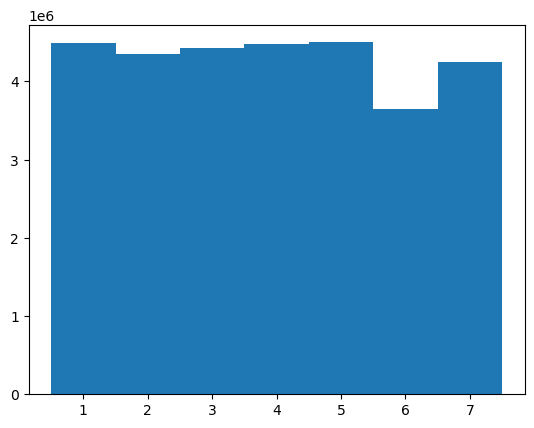

In [56]:
import matplotlib.pyplot as plt

bins = np.arange(1, 9) - 0.5
plt.hist(flights['DayOfWeek'], bins = bins)
plt.show()

We can see that Saturday has the fewest flights. On other days, the average airports load across the country appears to be similar.

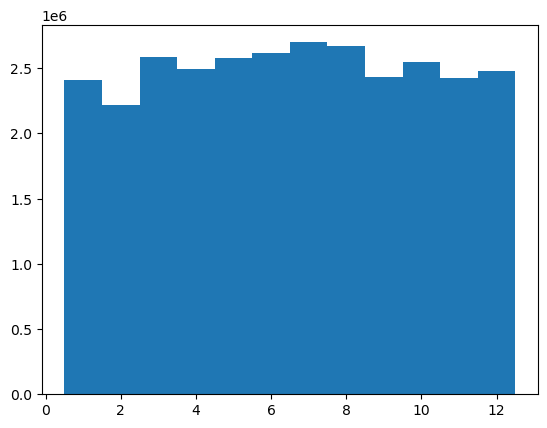

In [57]:
bins = np.arange(1, 14) - 0.5
plt.hist(flights['Month'], bins = bins)
plt.show()

The least busy month is February, while the summer months have the highest number of flights with peak in July.

(array([5819811., 5819079., 5617658., 5674621., 7213446.]),
 array([2013.5, 2014.5, 2015.5, 2016.5, 2017.5, 2018.5]),
 <BarContainer object of 5 artists>)

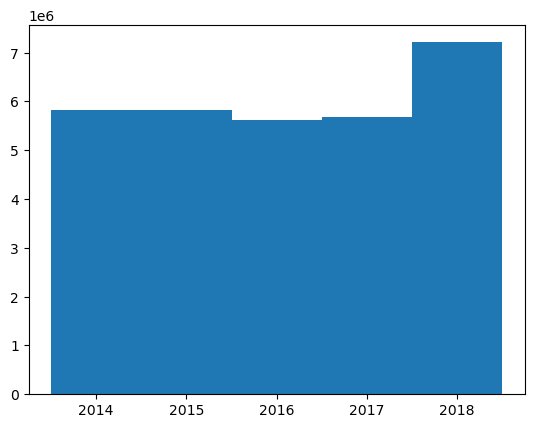

In [58]:
plt.hist(flights['Year'], bins = [2013.5, 2014.5, 2015.5, 2016.5, 2017.5, 2018.5])

The number of flight increased significantly in 2018

Now when we have the whole dataset with more than 30 mln of flights over 5 years period let's chech the data quality again.

In [59]:
flights[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate']].describe()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate
count,3.014462e+07,3.014462e+07,3.014462e+07,3.014462e+07,3.014462e+07,30144615
mean,2.016088e+03,2.513457e+00,6.539206e+00,1.574781e+01,3.931978e+00,2016-08-02 23:53:27.481891072
min,2.014000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2014-01-01 00:00:00
25%,2.015000e+03,2.000000e+00,4.000000e+00,8.000000e+00,2.000000e+00,2015-04-20 00:00:00
50%,2.016000e+03,3.000000e+00,7.000000e+00,1.600000e+01,4.000000e+00,2016-08-10 00:00:00
75%,2.017000e+03,3.000000e+00,9.000000e+00,2.300000e+01,6.000000e+00,2017-12-10 00:00:00
max,2.018000e+03,4.000000e+00,1.200000e+01,3.100000e+01,7.000000e+00,2018-12-31 00:00:00
std,1.450183e+00,1.105441e+00,3.399581e+00,8.775927e+00,1.990354e+00,NaN


All fields related to the date and time of the flights are correct and dont have outliers.

In [60]:
flights[['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek']].isna().sum()

Year          0
Quarter       0
Month         0
DayofMonth    0
DayOfWeek     0
dtype: int64

In [61]:
flights['Year'].unique()

array([2014, 2015, 2016, 2017, 2018], dtype=int16)

We also don't have missed data among data related to the date and time of flight.

We need to correct the actual Departure and Arrival Time fields (‘DepTime’ and ‘ArrTime’) because some entries show a time of 2400, which does not align with the scheduled time format (the maximum time is 2359). These should be adjusted to 00:00 of the next day.

In [62]:
# !!!!!! Delete before sending
flights_etalon = flights.copy()

In [63]:
# Corrction of 2400 time (it works after change of dtype of datetime fields)

import datetime
time_2400_filter = (flights.ArrTime == 2400) | (flights.DepTime == 2400)
print('There were', sum(time_2400_filter), 'rows having 2400 as Departure or Arrival Time')

def fix_time_2400(df, field_name):
    row_filter = (df[field_name] == 2400)
    for ind in df[row_filter].index:
        df.loc[ind, 'FlightDate'] += datetime.timedelta(days=1)
        df.loc[ind, 'Month'] = df.loc[ind, 'FlightDate'].month
        df.loc[ind, 'DayofMonth'] = df.loc[ind, 'FlightDate'].day
        df.loc[ind, 'DayOfWeek'] = df.loc[ind, 'FlightDate'].weekday()
        df.loc[ind, 'Year'] = df.loc[ind, 'FlightDate'].year
        df.loc[ind, field_name] == 0
    return df

flights = fix_time_2400(flights, 'ArrTime')
flights = fix_time_2400(flights, 'DepTime')

print('There are now', sum(time_2400_filter), 'rows having 2400 as Departure or Arrival Time')

There were 15510 rows having 2400 as Departure or Arrival Time
There are now 15510 rows having 2400 as Departure or Arrival Time


In [64]:
def change_time_format(name):
    time_array = np.array(flights[name])
    flights[name] = (time_array // 100) * 60 + (time_array % 100)

for fld_name in ['ArrTime', 'DepTime', 'CRSArrTime', 'CRSDepTime']:
    change_time_format(fld_name)

In [65]:
flights[['ArrTime', 'DepTime', 'CRSArrTime', 'CRSDepTime']].describe()

,ArrTime,DepTime,CRSArrTime,CRSDepTime
count,2.965071e+07,2.967964e+07,3.014462e+07,3.014462e+07
mean,8.960396e+02,8.126492e+02,9.066587e+02,8.082625e+02
std,3.095172e+02,2.959763e+02,3.062836e+02,2.919260e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,6.560000e+02,5.590000e+02,6.670000e+02,5.550000e+02
50%,9.110000e+02,8.080000e+02,9.200000e+02,8.020000e+02
75%,1.157000e+03,1.061000e+03,1.158000e+03,1.050000e+03
max,1.440000e+03,1.440000e+03,1.440000e+03,1.439000e+03


In [66]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30144615 entries, 0 to 30144614
Data columns (total 36 columns):
 #   Column                           Dtype         
---  ------                           -----         
 0   Year                             int16         
 1   Quarter                          int8          
 2   Month                            int8          
 3   DayofMonth                       int8          
 4   DayOfWeek                        int8          
 5   FlightDate                       datetime64[ns]
 6   Reporting_Airline                object        
 7   Flight_Number_Reporting_Airline  int16         
 8   OriginAirportID                  object        
 9   Origin                           object        
 10  DestAirportID                    object        
 11  Dest                             object        
 12  CRSDepTime                       int16         
 13  DepTime                          float32       
 14  DepDelay                        

In [67]:
flights[['ArrTime', 'DepTime', 'CRSArrTime', 'CRSDepTime']].isna().sum()

ArrTime       493904
DepTime       464976
CRSArrTime         0
CRSDepTime         0
dtype: int64

Let's examine the scheduled and actual elapsed time becuase I suppose to use them building a predictive model

In [68]:
flights[['CRSElapsedTime', 'ActualElapsedTime']].describe()

,CRSElapsedTime,ActualElapsedTime
count,3.014458e+07,2.958894e+07
mean,1.423408e+02,1.378260e+02
std,7.214629e+01,7.182362e+01
min,-9.900000e+01,1.400000e+01
25%,8.700000e+01,8.300000e+01
50%,1.230000e+02,1.190000e+02
75%,1.740000e+02,1.690000e+02
max,7.180000e+02,7.840000e+02


In [69]:
# Analysis of difference between 'ActualElapsedTime' and 'CRSElapsedTime'
flights['ElapsedTimeDiff'] = flights['ActualElapsedTime'] - flights['CRSElapsedTime']

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng(18)
gauss_distr = rng.normal(flights['ElapsedTimeDiff'].mean(),
                        flights['ElapsedTimeDiff'].std(),
                        size=1000000)

bins = np.arange(-50,50)

ElapsedTimeDiff_distrebution = flights[~flights['ElapsedTimeDiff'].isna()]['ElapsedTimeDiff']
plt.hist(ElapsedTimeDiff_distrebution, bins=bins, density=True)
plt.hist(gauss_distr, histtype='step', bins=bins, color='r', density=True)
plt.xlim(-50,50)
plt.show()


NameError: name 'flights' is not defined

In [169]:
print('Mean difference between scheduled and actual time', round(flights['ElapsedTimeDiff'].mean(), 2))
print('Standard deviation of the difference', round(flights['ElapsedTimeDiff'].std(), 2))

Mean difference between scheduled and actual time -4.73
Standard deviation of the difference 12.57


The diffence between acheduled and actual elapsed time is normally distribute, In average the actual elapsed time less than the scheduled (-4.73 min). However, this is the duration of the flight and not a arrival time.

It is interesting to examine the most negative values of the difference between scheduled and actual elapsed time: how shorter the actual duration of flight can be against its scheduled duration?

In [170]:
np.percentile(flights['ElapsedTimeDiff'], 25)

nan

In [124]:
flights['ElapsedTimeDiff'].describe()

count    2.958894e+07
mean    -4.733736e+00
std      1.256599e+01
min     -2.500000e+02
25%     -1.200000e+01
50%     -6.000000e+00
75%      1.000000e+00
max      4.850000e+02
Name: ElapsedTimeDiff, dtype: float64

Interesting!!!! Some flights lasted 250 minutes less than they were scheduled!!! Is it possiblethat these data can be wrong?

How many flights did arrive more than 30 minutes earlier?

In [125]:
actual_time_less_than_CRRS = flights['ElapsedTimeDiff'] < -30
print(flights[actual_time_less_than_CRRS][['Origin', 'Dest','ActualElapsedTime', 'CRSElapsedTime', 'ElapsedTimeDiff']].sort_values('ElapsedTimeDiff', ascending=True).head(10))
print('In 2014-2018 there were', flights[actual_time_less_than_CRRS]['Flight_Number_Reporting_Airline'].count(), 
      'flight arrived earlier for more than 30 minutes (', 
      round(flights[actual_time_less_than_CRRS]['Flight_Number_Reporting_Airline'].count() / len(flights) * 100, 2),
      '%)')

         Origin Dest  ActualElapsedTime  CRSElapsedTime  ElapsedTimeDiff
21568647    SBP  SFO               52.0           302.0           -250.0
26994453    DFW  LGA              207.0           431.0           -224.0
10814398    SAN  SFO               84.0           285.0           -201.0
24791714    PSP  SLC               93.0           290.0           -197.0
24184719    MKE  DTW               76.0           253.0           -177.0
26995623    LGA  IAH              220.0           395.0           -175.0
27731190    ORD  DCA              117.0           239.0           -122.0
12973578    SFO  BOS              334.0           456.0           -122.0
3885970     DEN  ANC              210.0           330.0           -120.0
27060967    SLN  HYS               44.0           161.0           -117.0
In 2014-2018 there were 428500 flight arrived earlier for more than 30 minutes ( 1.42 %)


In [144]:
# Details for the flight ind = 21568647 which has the most significant difference between scheduled and actual 
# elapsed times
data_details = ['Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate']
route_details = ['Origin', 'Dest']
DepArr_details = ['CRSDepTime', 'CRSArrTime', 'DepTime', 'ArrTime']

print(flights.iloc[21568647][data_details + route_details + DepArr_details + elapsed_time_fields])
print('Flight number:', flights.iloc[21568647]['Flight_Number_Reporting_Airline'])

Year                                2017
Quarter                                4
Month                                 10
DayofMonth                             9
DayOfWeek                              1
FlightDate           2017-10-09 00:00:00
Origin                               SBP
Dest                                 SFO
CRSDepTime                           535
CRSArrTime                           837
DepTime                            775.0
ArrTime                            827.0
CRSElapsedTime                     302.0
ActualElapsedTime                   52.0
AirTime                             35.0
Name: 21568647, dtype: object
Flight number: 5028


It seems strange that this flight was scheduled with 302 min of elapsed time (more then 5 hours!!!), because according to Google [search](https://www.google.com/maps/dir/SBP,+Airport+Drive,+San+Luis+Obispo,+CA,+USA/San+Francisco+International+Airport+(SFO),+San+Francisco,+CA,+USA/@36.4210897,-122.8306609,8z/data=!3m1!4b1!4m14!4m13!1m5!1m1!1s0x80ecf6bf3876b9f1:0xf486acd07a0f3bd2!2m2!1d-120.6420121!2d35.2375699!1m5!1m1!1s0x808f778c55555555:0xa4f25c571acded3f!2m2!1d-122.3816274!2d37.6191145!3e4?entry=ttu&g_ep=EgoyMDI0MTAwMi4xIKXMDSoASAFQAw%3D%3D) shows that these airports are quite close to each other and estimated the direct flight time as 1h 5min, which is more close to the acctual elapsed time

In [134]:
# Details for the flight ind = 26994453 which has the second most significant difference between scheduled and actual 
# elapsed times
print(flights.iloc[26994453][data_details + route_details + DepArr_details + elapsed_time_fields])
print('Flight number:', flights.iloc[26994453]['Flight_Number_Reporting_Airline'])


Year                                2018
Quarter                                3
Month                                  7
DayofMonth                            25
DayOfWeek                              3
FlightDate           2018-07-25 00:00:00
Origin                               DFW
Dest                                 LGA
CRSDepTime                          1084
CRSArrTime                           135
DepTime                            564.0
ArrTime                            831.0
CRSElapsedTime                     431.0
ActualElapsedTime                  207.0
AirTime                            182.0
Name: 26994453, dtype: object
5935


The second most differing flight has the same story: Google [search](https://www.google.com/maps/dir/LaGuardia+Airport+(LGA),+East+Elmhurst,+NY,+USA/Dallas+Fort+Worth+International+Airport+(DFW),+2400+Aviation+Dr,+Dallas,+TX+75261,+United+States/@36.3681193,-96.0279203,5z/data=!3m1!4b1!4m14!4m13!1m5!1m1!1s0x89c25f8983424db5:0x772fc4660e9666b3!2m2!1d-73.8742467!2d40.7766422!1m5!1m1!1s0x864c2a660d222aa7:0x73323f5e067d201c!2m2!1d-97.0335765!2d32.8990434!3e4?entry=ttu&g_ep=EgoyMDI0MTAwMi4xIKXMDSoASAFQAw%3D%3D) shows the estimated time of the direct flight 3h 40m which again closer to the actual elapsed time and far away from scheduled 431 min - more than 7h!

In [145]:
_fl = transform_data_from(source_zip, source_path + '2017_10.csv')
_fl[(_fl['Flight_Number_Reporting_Airline'] == 5028) 
    & (_fl['DayofMonth'] == 9) 
    & (_fl['Origin'] == 'SBP')
    & (_fl['Dest'] == 'SFO')]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
35642,2017,4,10,9,1,2017-10-09,OO,20304,OO,N952SW,5028,14698,1469802,34236,SBP,"San Luis Obispo, CA",CA,6,California,91,14771,1477102,32457,SFO,"San Francisco, CA",CA,6,California,91,855,1255.0,240.0,240.0,1.0,12.0,0800-0859,13.0,1308.0,1343.0,4.0,1357,1347.0,-10.0,0.0,0.0,-1.0,1300-1359,False,NaN,False,302.0,52.0,35.0,1.0,190.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
_fl = transform_data_from(source_zip, source_path + '2018_7.csv')
_fl[(_fl['Flight_Number_Reporting_Airline'] == 5935) 
    & (_fl['DayofMonth'] == 25) 
    & (_fl['Origin'] == 'DFW')
    & (_fl['Dest'] == 'LGA')]

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
521680,2018,3,7,25,3,2018-07-25,YX,20452,YX,N874RW,5935,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1804,924.0,920.0,920.0,1.0,12.0,1800-1859,20.0,944.0,1346.0,5.0,215,1351.0,696.0,696.0,1.0,12.0,0001-0559,False,NaN,False,431.0,207.0,182.0,1.0,1389.0,6,657.0,0.0,0.0,0.0,39.0,NaN,NaN,NaN,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Despite 1.12% is not segnificant, let's check is the Elapsed time counted correctly, taking into account the difference in timezones of the Origin and Destinion ariports.

NOTE: acctually I did this part just for practice, for demonstration and for fun.

In [216]:
from datetime import datetime, timedelta, timezone
from dateutil import tz

# Loading timezones for IATA codes of airports
IATAtz_df = pd.read_csv('https://raw.githubusercontent.com/hroptatyr/dateutils/tzmaps/iata.tzmap', 
                        sep = '\t', 
                        index_col=0, 
                        header=None)
IATAtz = IATAtz_df.to_dict('dict')[1]

In [221]:
def airport_time_tz(dt, IATA_code: str):
    return dt.replace(tzinfo=tz.gettz(IATAtz[IATA_code]))

def airport_time_UTC(dt, IATA_code: str):
    return dt.replace(tzinfo=tz.gettz(IATAtz[IATA_code])).astimezone(tz.UTC)

In [ ]:
a = flights_2014_1.iloc[418380]
CRSDepTime = datetime(a.Year, a.Month, a.DayofMonth, a.CRSDepTime // 100, a.CRSDepTime % 100)
CRSArrTime = datetime(a.Year, a.Month, a.DayofMonth, a.CRSArrTime // 100, a.CRSArrTime % 100)

print('CRS: ')
print(a.Origin, '\nTime zone: ', tz.gettz(IATAtz[a.Origin]))
print('Local departure time:      ', CRSDepTime)
print('Local departure time (tz): ', airport_time_tz(CRSDepTime, a.Origin))
print('UTC Departure time:        ', airport_time_UTC(CRSDepTime, a.Origin))
print('')
print(a.Dest, '\nTime zone: ', tz.gettz(IATAtz[a.Dest]))
print('Local departure time:      ', CRSArrTime)
print('Local departure time (tz): ', airport_time_tz(CRSArrTime, a.Dest))
print('UTC Departure time:        ', airport_time_UTC(CRSArrTime, a.Dest))
print('')
print('Elapsed time (CRS):', round(a.CRSElapsedTime / 60, 2))
print('Elapsed time (UTC):', round((airport_time_UTC(CRSArrTime, a.Dest) - airport_time_UTC(CRSDepTime, a.Origin)).seconds / 3600, 2))

In [ ]:
from datetime import datetime, timedelta, timezone
from dateutil import tz

a = flights_2014_1.iloc[418380]
DepTime = datetime(a.Year, a.Month, a.DayofMonth, int(a.DepTime // 100), int(a.DepTime % 100))
ArrTime = datetime(a.Year, a.Month, a.DayofMonth, int(a.ArrTime // 100), int(a.ArrTime % 100))

print('Actual: ')
print(a.Origin, '\nTime zone: ', tz.gettz(IATAtz[a.Origin]))
print('Local departure time:      ', DepTime)
print('Local departure time (tz): ', airport_time_tz(DepTime, a.Origin))
print('UTC Departure time:        ', airport_time_UTC(DepTime, a.Origin))
print('')
print(a.Dest, '\nTime zone: ', tz.gettz(IATAtz[a.Dest]))
print('Local departure time:      ', ArrTime)
print('Local departure time (tz): ', airport_time_tz(ArrTime, a.Dest))
print('UTC Departure time:        ', airport_time_UTC(ArrTime, a.Dest))
print('')
print('Elapsed time (Act):', round(a.ActualElapsedTime / 60, 2))
print('Elapsed time (UTC):', round((airport_time_UTC(ArrTime, a.Dest) - airport_time_UTC(DepTime, a.Origin)).seconds / 3600, 2))

Ok, we see that the data for the flight wiht the earliest arrival is correct. 
Let's check correctness of Elapsed times for the sample of 1000 flights

In [ ]:
import random
n = 10000

for i in random.sample(range(0, len(flights_2014_1)), n):
    a = flights_2014_1.iloc[i]
    flag = True
    if ~a.Cancelled & ~a.Diverted:
        CRSDepTime = datetime(a.Year, a.Month, a.DayofMonth, a.CRSDepTime // 100, a.CRSDepTime % 100)
        CRSArrTime = datetime(a.Year, a.Month, a.DayofMonth, a.CRSArrTime // 100, a.CRSArrTime % 100)
        DepTime = datetime(a.Year, a.Month, a.DayofMonth, int(a.DepTime // 100), int(a.DepTime % 100))
        ArrTime = datetime(a.Year, a.Month, a.DayofMonth, int(a.ArrTime // 100), int(a.ArrTime % 100))
        CRSElapseTimeDiff = round(a.CRSElapsedTime / 60, 2) - round((airport_time_UTC(CRSArrTime, a.Dest) - airport_time_UTC(CRSDepTime, a.Origin)).seconds / 3600, 2)
        ActElapseTimeDiff = round(a.ActualElapsedTime / 60, 2) - round((airport_time_UTC(ArrTime, a.Dest) - airport_time_UTC(DepTime, a.Origin)).seconds / 3600, 2)
        if (CRSElapseTimeDiff != 0) | (ActElapseTimeDiff != 0):
            print(a.Flight_Number_Reporting_Airline, CRSElapseTimeDiff, ActElapseTimeDiff)
            flag = False
if flag:
    print('For the sample', n, 'flights all elapsed time calculated correctly')